In [280]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from utilities import visualize_classifier
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [281]:
data = pd.read_excel('hackaton_data.xlsx',header=0)
data.drop('ADDRESS', axis=1, inplace=True)
data.drop('CITY', axis=1, inplace=True)
data.drop('REGION', axis=1, inplace=True)
data.drop('Postamat_trend', axis=1, inplace=True)
data.drop('cashbox_MAX', axis=1, inplace=True)
data.drop('cashbox_trend', axis=1, inplace=True)
data.fillna(0, inplace=True)
data.loc[data.NEAR_Stations!=0, 'NEAR_Stations'] = 1
#для предсказания для постамата
train_p = data.loc[data.Postamat_daily!=0]
predict_p = data.loc[data.Postamat_daily==0]
#для предсказания для кассы
train_c = data.loc[data.cashbox_daily!=0]
predict_c = data.loc[data.cashbox_daily==0]
predict_c.head()

,Unnamed: 0,Postamat_daily,cashbox_daily,hh_500,value1,value2,POPULATION,NEAR_Malls,NEAR_Business_centers,NEAR_metro_rjd,NEAR_Stations,macro_salary_avg_yearly
1,1,0.0,0.0,6369.0,10068,3236,324698,1,1,0.0,1,423321
5,5,0.0,0.0,5023.0,10100,3484,482873,1,0,0.0,1,387679
9,9,2.0,0.0,8732.0,10097,3197,482873,0,0,0.0,1,387679
12,12,0.0,0.0,6686.0,10094,3187,482873,1,0,0.0,1,387679
14,14,6.0,0.0,4112.0,10100,3475,482873,1,0,0.0,1,387679


In [282]:
x_train_p = train_p.iloc[:,3:]
x_predict_p = predict_p.iloc[:,3:]
y_train_p = train_p['Postamat_daily']

x_train_c = train_c.iloc[:,3:]
x_predict_c = predict_c.iloc[:,3:]
y_train_c = train_c['cashbox_daily']
x_predict_c.head(10)

,hh_500,value1,value2,POPULATION,NEAR_Malls,NEAR_Business_centers,NEAR_metro_rjd,NEAR_Stations,macro_salary_avg_yearly
1,6369.0,10068,3236,324698,1,1,0.0,1,423321
5,5023.0,10100,3484,482873,1,0,0.0,1,387679
9,8732.0,10097,3197,482873,0,0,0.0,1,387679
12,6686.0,10094,3187,482873,1,0,0.0,1,387679
14,4112.0,10100,3475,482873,1,0,0.0,1,387679
16,7339.0,10085,3142,482873,0,0,0.0,1,387679
17,7552.0,10036,2945,324698,0,1,0.0,0,423321
18,7054.0,10091,3043,482873,1,0,0.0,0,387679
19,3773.0,10094,3114,324698,0,1,0.0,1,423321
20,5082.0,10042,3003,482873,1,1,0.0,1,387679


In [283]:
rf = RandomForestRegressor(min_samples_leaf=1)
rf.fit(x_train_p, y_train_p)

C:\Users\irisc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [284]:
sqrt(mean_squared_error(rf.predict(x_train_p), y_train_p))

0.5085382100797453

Text(0, 0.5, 'Estimated quality')

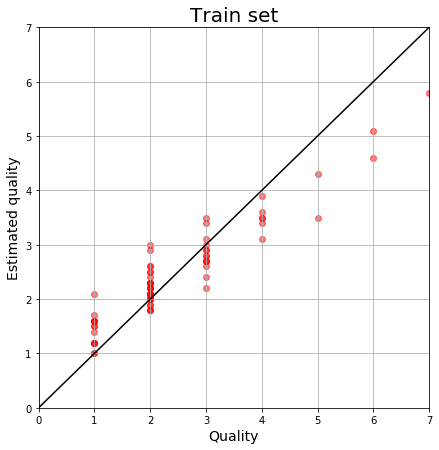

In [285]:
plt.figure(figsize(7,7))
pyplot.scatter(np.array(y_train_p), rf.predict(x_train_p), color="red", alpha=0.5)
pyplot.xlim(0,7)
pyplot.ylim(0,7)
plot(range(11), color='black')
grid()
pyplot.title('Train set', fontsize=20)
pyplot.xlabel('Quality', fontsize=14)
pyplot.ylabel('Estimated quality', fontsize=14)

In [287]:
pred = rf.predict(x_predict_p)
pred

array([3.3, 3.1, 3.4, 5. , 3.3, 1.9, 5. , 3.1, 3.2, 2.4, 3. , 2.2, 1.8,
       2.8, 3. , 2.1, 2.5, 3.3, 2.8, 2.8, 2.9, 3.4, 3.4, 3. , 2.5, 2.8,
       2.6, 2.5, 1.8, 2.7, 2.5, 2.3, 1.9, 3.7, 2.2, 2.4, 2. , 3.5, 2.7,
       3.1, 1.8, 3.1, 2.3, 2.5, 2.9, 3.3, 2.3, 2. , 2.1, 2.5, 2.5, 2.4,
       2.5, 2.8, 2. , 2.4, 2.2, 3.1, 2.8, 3.1, 2. , 2.4, 2.2, 1.9, 2.1,
       1.7, 1.9, 2. , 2. , 1.9, 2.2, 2. , 3.3, 2.5, 1.7, 2.4, 2.3, 2.4,
       2.2, 2.1, 2. , 1.9, 1.8, 1.9, 2. , 3.3, 1.9, 2.5, 2.3, 1.9, 1.8,
       1.6, 1.9, 1.8, 3. , 2.3, 2.1, 2. , 2. , 2.9, 2.4, 2.3, 1.7, 1.9,
       2.1, 2.3, 2.3, 2.9, 2.2, 2. , 2.1, 1.9, 2. , 1.9, 2. , 1.9, 1.8,
       1.9, 2.2, 1.9, 1.9, 2.1, 2.1, 1.4, 2.4, 2.5, 2.5, 2.3, 2.4, 2.4,
       1.8, 2.4, 2.1, 1.9, 1.8, 1.6, 1.1, 1.6, 1.9, 2.1, 2.9, 3.2, 3.1,
       2.2, 1.9, 1.8, 1.9, 1.7, 2. , 1.8, 2.7, 1.9, 1.9, 2. , 1.9, 1.9,
       1.9, 2. , 1.9, 2.1, 2.2, 2.2, 2.3, 2.1, 2.2, 2. , 2.6, 2.3, 2.9,
       2.9, 2.5, 2.3, 2.2, 2. , 2.5, 1.2, 2.4, 1.2, 2.6, 2.3, 2.

In [296]:
y_predict_p = np.array(predict_p.iloc[:,0:0])


y_predict_data_p = predict_p.iloc[:,0:0]
addresses = pd.read_excel('hackaton_data.xlsx',header=0)
addresses.fillna(0, inplace=True)
addresses_p = addresses.loc[addresses.Postamat_daily==0][['ADDRESS','CITY','REGION']]
y_predict_data_p[['ADDRESS','CITY','REGION']] = addresses_p
y_predict_data_p.head()

,ADDRESS,CITY,REGION
0,"г.Калуга, Литейная ул., 25/15",КАЛУГА,Калужская область
1,"г.Калуга, Гагарина ул., 1",КАЛУГА,Калужская область
2,"г.Калуга, Кибальчича ул., 25",КАЛУГА,Калужская область
5,"г.Тула, Кутузова ул., 13",ТУЛА,Тульская область
6,"г.Калуга, Фридриха Энгельса ул., 78А п.1",КАЛУГА,Калужская область


In [274]:
rf = RandomForestRegressor(min_samples_leaf=1)
rf.fit(x_train_c, y_train_c)
sqrt(mean_squared_error(rf.predict(x_train_c), y_train_c))

C:\Users\irisc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.31571063113930625

Text(0, 0.5, 'Estimated quality')

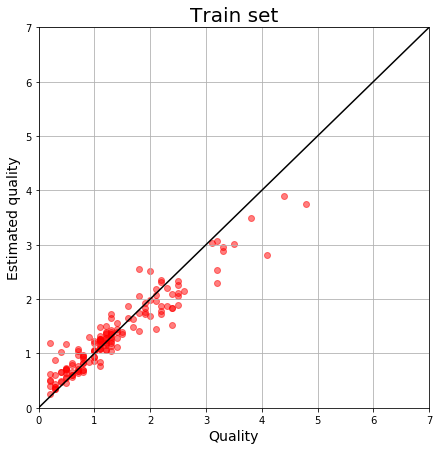

In [275]:
plt.figure(figsize(7,7))
pyplot.scatter(np.array(y_train_c), rf.predict(x_train_c), color="red", alpha=0.5)
pyplot.xlim(0,7)
pyplot.ylim(0,7)
plot(range(11), color='black')
grid()
pyplot.title('Train set', fontsize=20)
pyplot.xlabel('Quality', fontsize=14)
pyplot.ylabel('Estimated quality', fontsize=14)

In [279]:
y_predict_c = predict_c.iloc[:,0:0]
y_predict_c['cashbox_daily'] = pd.DataFrame(rf.predict(x_predict_c))
address = pd.read_excel('hackaton_data.xlsx',header=0)
address.fillna(0, inplace=True)
addresses_c = addresses.loc[address.cashbox_daily==0][['ADDRESS','CITY','REGION']]
y_predict_c[['ADDRESS','CITY','REGION']] = addresses_c
y_predict_c.head(10)

,cashbox_daily,ADDRESS,CITY,REGION
1,3.31,"г.Калуга, Гагарина ул., 1",КАЛУГА,Калужская область
5,1.97,"г.Тула, Кутузова ул., 13",ТУЛА,Тульская область
9,3.12,"г.Тула, Марата ул., 31 А",ТУЛА,Тульская область
12,2.76,"г.Тула, Степанова ул., 89 А",ТУЛА,Тульская область
14,2.93,"г.Тула, Кауля ул., 20/109",ТУЛА,Тульская область
16,1.85,"г.Тула, Пузакова ул., 1",ТУЛА,Тульская область
17,2.19,"г.Калуга, Мичурина ул., 11",КАЛУГА,Калужская область
18,2.11,"г.Тула, Октябрьская ул., 81",ТУЛА,Тульская область
19,1.99,"г.Калуга, Пушкина ул., 3 п.68",КАЛУГА,Калужская область
20,1.40,"г.Тула, Болдина ул., 98",ТУЛА,Тульская область
